In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os


In [2]:
image_path = '/media/duanj/F/joe/hcp_2/581450/T1w/Diffusion/fixel_directory/index.nii.gz'

In [3]:
x = nib.load(image_path)
indexes = np.array(x.dataobj)[:,:,:,0]

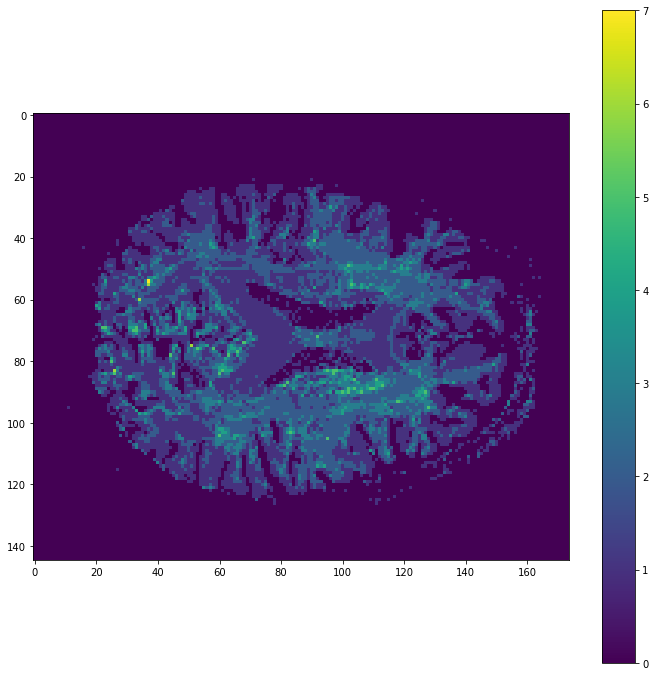

In [4]:
#visualise the indexes:
plt.figure(figsize = (12,12))
plt.imshow(indexes[:,:,72])
plt.colorbar()

(array([3.10994e+05, 2.00673e+05, 7.66720e+04, 2.40950e+04, 1.09750e+04,
        4.97900e+03, 1.80000e+03, 3.88000e+02, 5.30000e+01, 8.00000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

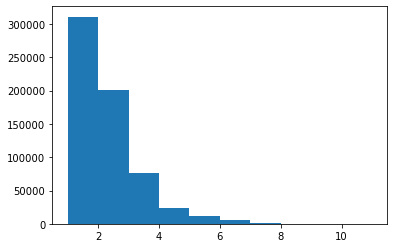

In [31]:
fig, ax = plt.subplots(1,1)
vals = indexes[indexes != 0]

ax.hist(vals)

In [52]:
vals_count = Counter(vals.tolist())
print(vals_count)

Counter({1: 310994, 2: 200673, 3: 76672, 4: 24095, 5: 10975, 6: 4979, 7: 1800, 8: 388, 9: 53, 10: 6, 11: 2})


In [53]:
vals_count.values()

dict_values([310994, 200673, 76672, 10975, 24095, 4979, 1800, 388, 53, 6, 2])

In [50]:
[(100*c)/len(vals.tolist()) for c in vals_count.values()]

[49.314264783068545,
 31.82068289681703,
 12.157865776984224,
 1.7403038515025284,
 3.8207399819547536,
 0.7895191687135389,
 0.28542568862911627,
 0.06152509288227617,
 0.008404200831857313,
 0.0009514189620970543,
 0.0003171396540323514]

(145, 174, 145)
Counter({1: 310994, 2: 200673, 3: 76672, 4: 42298})
[49.314264783068545, 31.82068289681703, 12.157865776984224, 6.7071865431302005]


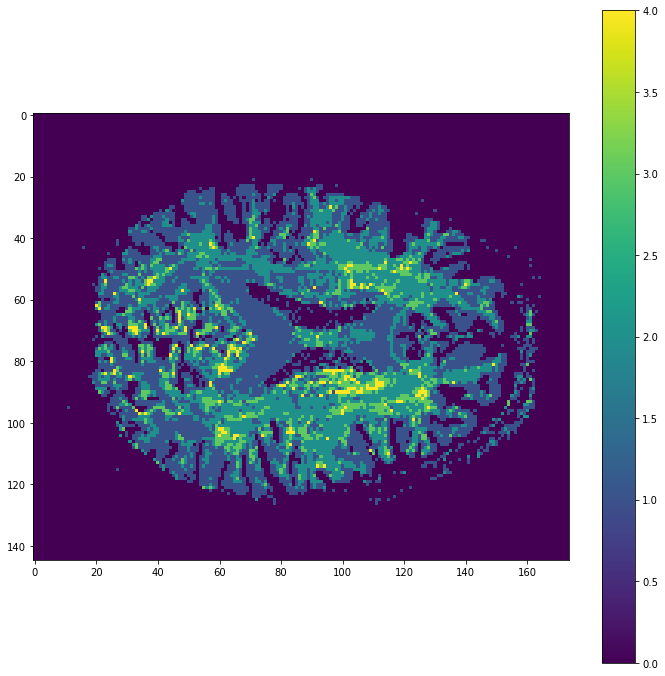

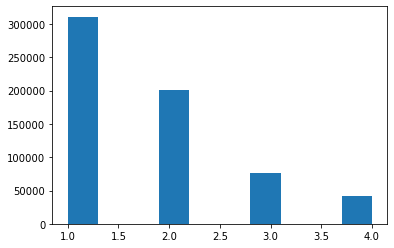

In [5]:
##Instead of treating the number of voxels as individual classes seperate the classes as 1,2,3,4+ classes.
#This is a valid approach since its expected that 4+ will contain spurious peaks anyway. 
print(indexes.shape)
indexes[indexes >= 4] = 4

plt.figure(figsize = (12,12))
plt.imshow(indexes[:,:,72])
plt.colorbar()

vals = indexes[indexes != 0]

fig, ax = plt.subplots(1,1)
ax.hist(vals)

vals_count = Counter(vals.tolist())
print(vals_count)

print([(100*c)/len(vals.tolist()) for c in vals_count.values()])


In [6]:
gt = indexes

Counter({1: 361851, 2: 135959, 3: 14916, 4: 2210})
[70.27106281168922, 26.40308698556714, 0.4291795485264188, 2.896670654217223]


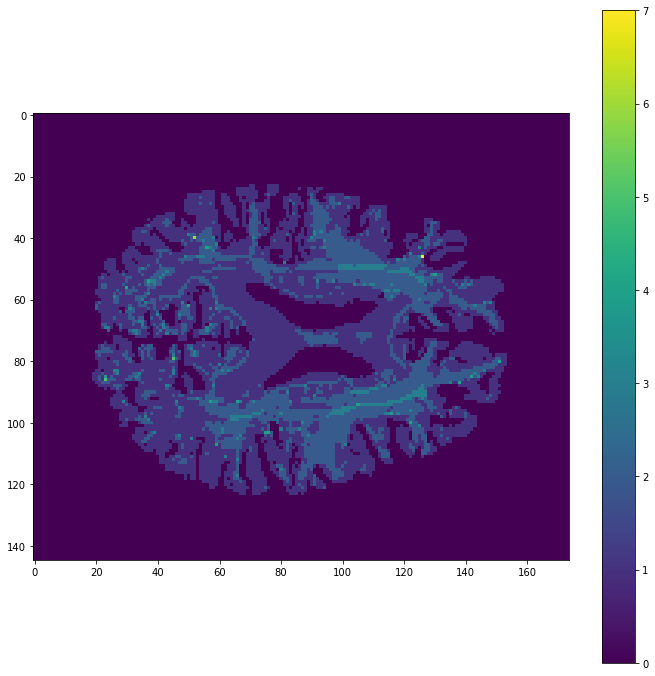

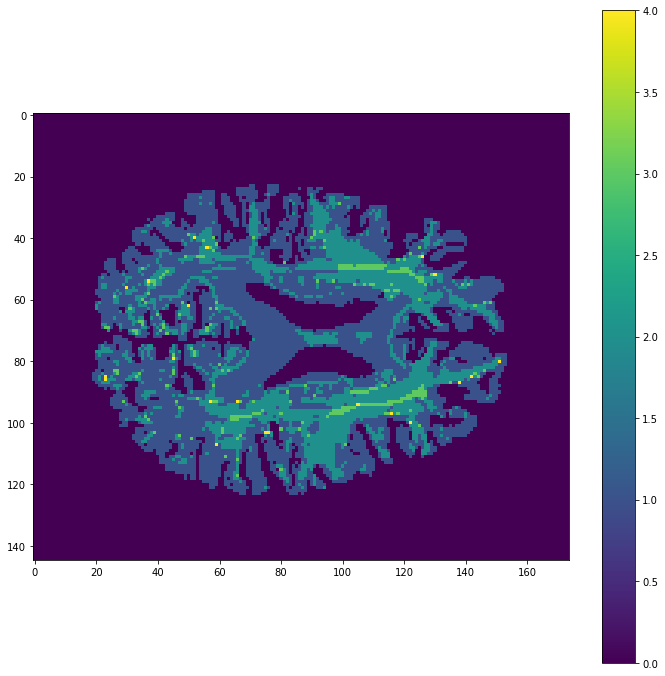

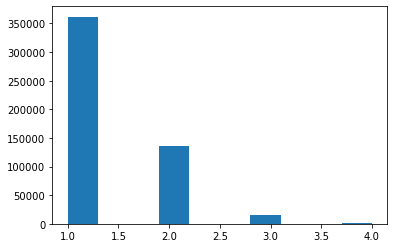

In [89]:
##Comparing the number for the images which have already been predicted.
deep_sh_casc_path = '/media/duanj/F/joe/CSD_experiments/deep_sh_casc/inference/581450/fixel_directory/index.nii.gz'

x = nib.load(deep_sh_casc_path)
indexes = np.array(x.dataobj)[:,:,:,0]

plt.figure(figsize = (12,12))
plt.imshow(indexes[:,:,72])
plt.colorbar()

indexes[indexes >= 4] = 4

plt.figure(figsize = (12,12))
plt.imshow(indexes[:,:,72])
plt.colorbar()

vals = indexes[indexes != 0]

fig, ax = plt.subplots(1,1)
ax.hist(vals)

vals_count = Counter(vals.tolist())
print(vals_count)

print([(100*c)/len(vals.tolist()) for c in vals_count.values()])

Counter({1.0: 266979, 2.0: 190407, 3.0: 28665, 4.0: 17673})
[53.001048193058104, 37.79986659361079, 5.6906162898730255, 3.5084689234580844]


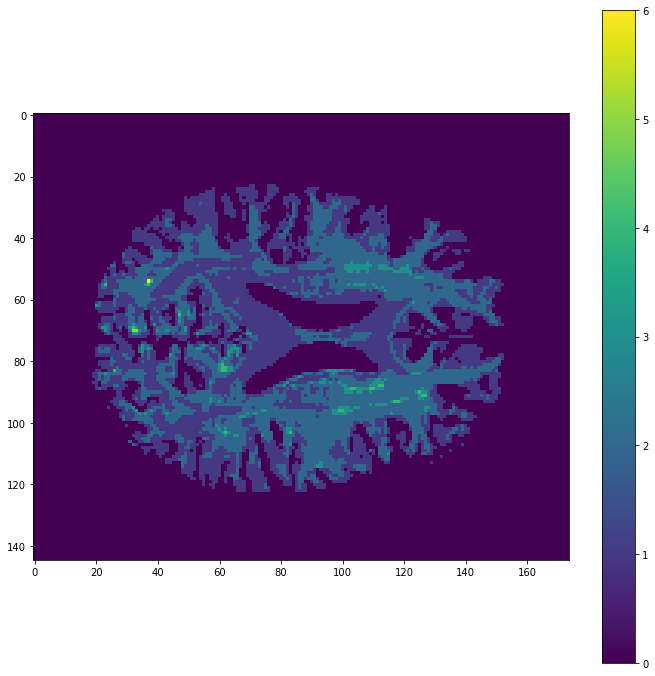

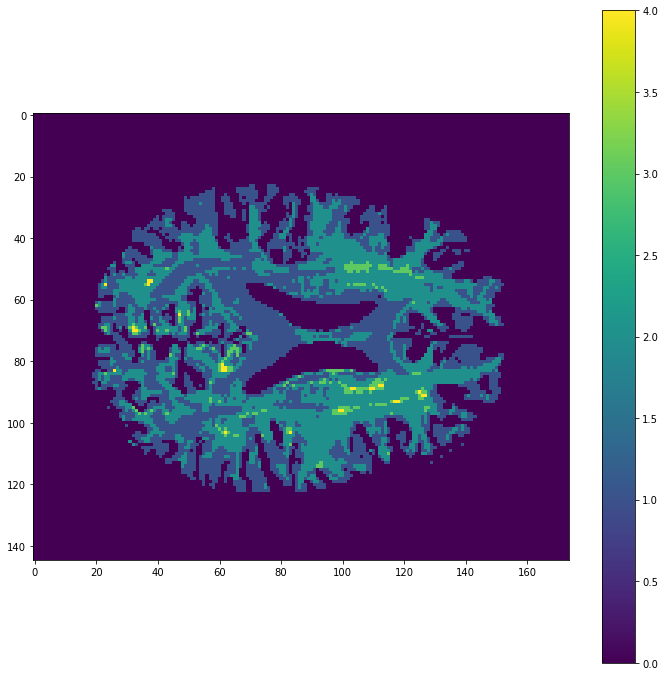

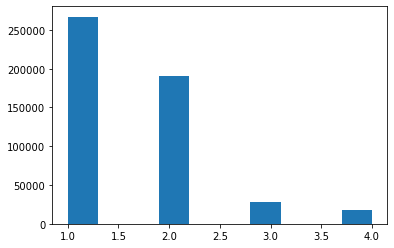

In [90]:
##Analysis for predicted grount truth
##Comparing the number for the images which have already been predicted.
gt_net_path = '/home/jxb1336/code/Project_1: HARDI_Recon/FOD-REG_NET/fixel_loss/checkpoints/581450/gt_fix.nii.gz'

x = nib.load(gt_net_path)
indexes = np.array(x.dataobj)[:,:,:]

plt.figure(figsize = (12,12))
plt.imshow(indexes[:,:,72])
plt.colorbar()

indexes[indexes >= 4] = 4

plt.figure(figsize = (12,12))
plt.imshow(indexes[:,:,72])
plt.colorbar()

vals = indexes[indexes != 0]

fig, ax = plt.subplots(1,1)
ax.hist(vals)

vals_count = Counter(vals.tolist())
print(vals_count)

print([(100*c)/len(vals.tolist()) for c in vals_count.values()])

Counter({1.0: 340670, 2.0: 132580, 3.0: 11434, 4.0: 795})
[70.17193328650673, 27.309111207693846, 2.3551997099771564, 0.16375579582227037]


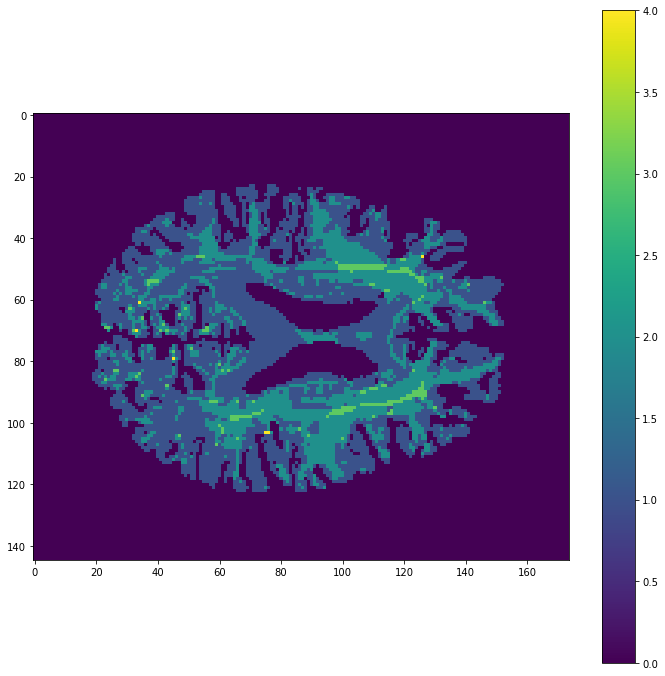

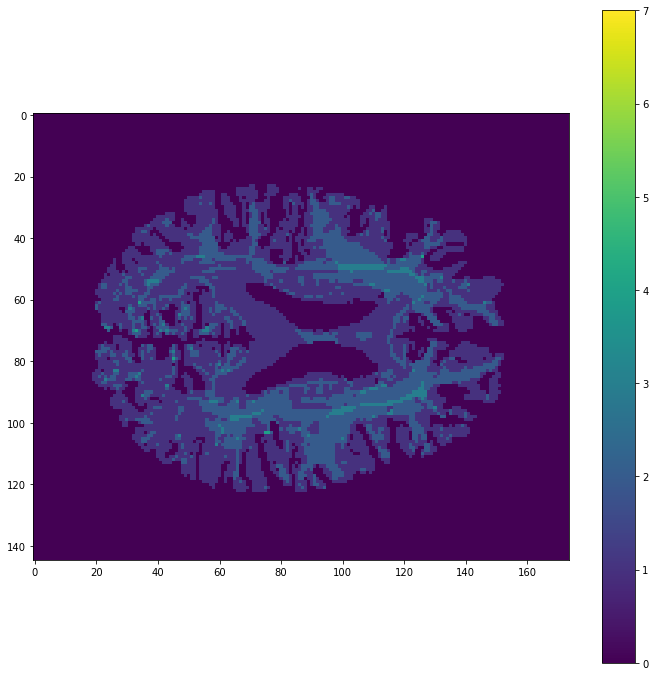

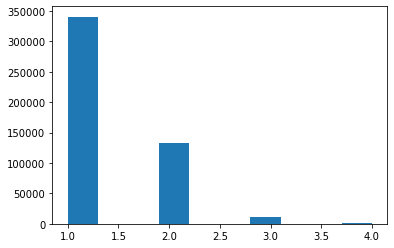

In [7]:
##Analysis for predicted SDNet
SDNet_net_path = '/home/jxb1336/code/Project_1: HARDI_Recon/FOD-REG_NET/fixel_loss/checkpoints/581450/deep_sh_casc_fix.nii.gz'

x = nib.load(SDNet_net_path)
indexes = np.array(x.dataobj)[:,:,:]

plt.figure(figsize = (12,12))
plt.imshow(indexes[:,:,72])
plt.colorbar()

indexes[indexes >= 4] = 4

plt.figure(figsize = (12,12))
plt.imshow(indexes[:,:,72], vmax=7)
plt.colorbar()

vals = indexes[indexes != 0]

fig, ax = plt.subplots(1,1)
ax.hist(vals)

vals_count = Counter(vals.tolist())
print(vals_count)

print([(100*c)/len(vals.tolist()) for c in vals_count.values()])

In [8]:
inf = indexes

In [91]:
#Creating the thresholded fixel images for the lassification network. 
train_subject_list = ['100206',
'100307',
'100408',
'100610',
'101006',
'101107',
'101309',
'101915',
'102109',
'102311',
'102513',
'102614',
'102715',
'102816',
'103010',
'103111',
'103212',
'103414',
'103515',
'103818',
'104012',
'104416',
'104820']


for subject in train_subject_list:
    gt_path = os.path.join('/media/duanj/F/joe/hcp_2', subject, 'T1w', 'Diffusion', 'fixel_directory', 'index.nii.gz')
    if not os.path.isdir(os.path.join('/media/duanj/F/joe/hcp_2', subject, 'T1w', 'Diffusion', 'fixel_directory', 'fixnet_targets')):
        os.mkdir(os.path.join('/media/duanj/F/joe/hcp_2', subject, 'T1w', 'Diffusion', 'fixel_directory', 'fixnet_targets'))
    save_path = os.path.join('/media/duanj/F/joe/hcp_2', subject, 'T1w', 'Diffusion', 'fixel_directory', 'fixnet_targets','gt_threshold_fixels.nii.gz')

    nifti = nib.load(gt_path)
    aff = nifti.affine

    fix_im = np.array(nifti.dataobj)
    fix_im[fix_im >= 4] = 4

    nifti_updated = nib.Nifti1Image(fix_im, aff)

    nib.save(nifti_updated, save_path)



In [85]:
print(nifti)
print(aff)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (145, 174, 145, 2)
affine: 
[[  -1.25    0.      0.     90.  ]
 [   0.      1.25    0.   -126.  ]
 [   0.      0.      1.25  -72.  ]
 [   0.      0.      0.      1.  ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'FSL5.0'
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 145 174 145   2   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    1.25  1.25  1.25  1.    0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'M

[[8.57980e+04 4.56000e+02 6.00000e+00 0.00000e+00 0.00000e+00]
 [3.17110e+04 1.24893e+05 1.33940e+04 2.60000e+01 0.00000e+00]
 [2.73100e+03 4.27940e+04 8.55350e+04 1.42300e+03 2.70000e+01]
 [2.01000e+02 5.11400e+03 3.61880e+04 8.86800e+03 5.48000e+02]
 [3.20000e+01 3.00000e+02 4.76600e+03 7.40400e+03 2.53100e+03]]


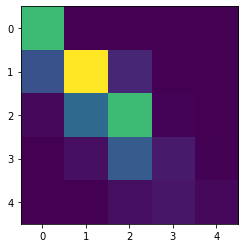

In [58]:
gt_path = '/media/duanj/F/joe/hcp_2/581450/T1w/Diffusion/fixel_directory/index.nii.gz'
inference_path = '/home/jxb1336/code/Project_1: HARDI_Recon/FOD-REG_NET/fixel_loss/checkpoints/581450/gt_fix.nii.gz'

gt_nifti = nib.load(gt_path)
inference_nifti = nib.load(inference_path)

gt_array = np.array(gt_nifti.dataobj)
inference_array = np.array(inference_nifti.dataobj)

confusion_matrix = np.zeros((5,5))

for i in range(5):
    for j in range(5):
        confusion_matrix[i,j] = np.sum((gt_array[:,:,:,0] == i) & (inference_array == j) & (wm_gm_mask == 1))

print(confusion_matrix)


plt.imshow(confusion_matrix[:,:])

In [59]:
#confusion_matrix = confusion_matrix[1:,1:]
np.sum(confusion_matrix.diagonal())/np.sum(confusion_matrix)

0.6764765385511912

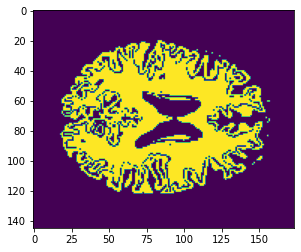

In [12]:
##How many voxels with zero fibres are in the area I am using for training:
ttgen_path = '/media/duanj/F/joe/hcp_2/581450/T1w/5ttgen.nii.gz'
ttgen_nifti = nib.load(ttgen_path)
ttgen_array = np.array(ttgen_nifti.dataobj)

plt.imshow((ttgen_array[:,:,72,2] == 1) | (ttgen_array[:,:,72,1] == 1) | (ttgen_array[:,:,72,0] == 1))
wm_gm_mask = (ttgen_array[:,:,:,2] == 1) | (ttgen_array[:,:,:,1] == 1) | (ttgen_array[:,:,:,0] == 1)

#print(np.sum(gt_array[:,:,:,0][wm_gm_mask == 1] == 4)/gt_array[:,:,:,0][wm_gm_mask == 1].size)

In [48]:
print(gt_array[wm_gm_mask == 1].shape)
print(gt_array[:,:,:,0][wm_gm_mask == 1].shape)

(467028, 2)
(467028,)


In [17]:
print(inf.shape)
print(gt.shape)

inf_masked = inf[wm_gm_mask == 1]
gt_masked = gt[wm_gm_mask == 1]

print(inf_masked.shape)
print(gt_masked.shape)

np.sum(inf_masked == gt_masked)/len(inf_masked)

(145, 174, 145)
(145, 174, 145)
(467028,)
(467028,)


0.6185753316717627